Reading E-mails data whether it is a Ham or Spam



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
sms = pd.read_csv('sms.csv')

In [ ]:
sms.shape

(5572, 2)

In [ ]:
sms.head(20)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
sms.label.value_counts()/sum(sms.label.value_counts()) * 100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [ ]:
# convert label to a numeric variable
sms['label'] = sms.label.map({'ham':0, 'spam':1})

In [ ]:
sms.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import textblob
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import re
word=WordNetLemmatizer()

In [ ]:
def pre_process_text(x):
    x=x.lower()
    x=x.strip()
    x = re.sub(r' +', ' ', x)
    x = re.sub(r"[-()\"#/@;:{}`+=~|.!?,^_^'0-9]", "", x)
    x=x=" ".join([word.lemmatize(w,pos='v') for w in x.split()])  # lemmatization
    #x=str(TextBlob(x).correct()) # spelling correction
    return(x)

In [ ]:
sms['message']=sms['message'].apply(lambda x:pre_process_text(x))

In [ ]:
sms.head()

,label,message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joke wif u oni
2,1,free entry in a wkly comp to win fa cup final ...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he go to usf he live around h...


In [ ]:
x=sms.message
y=sms.label

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.3,random_state=100)
print(train_x.shape)
print(test_x.shape)
print(test_y.shape)
print(train_y.shape)

(3900,)
(1672,)
(1672,)
(3900,)


Vectorizing the E-mails

In [ ]:
vect = CountVectorizer(analyzer='word',lowercase=True,ngram_range=(1,2), max_features=700, max_df=1.0, min_df=10,stop_words=['xxx','lui','ll','ltdecimal it','re'])

In [ ]:
vect.fit(train_x)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['it', 'ltdecimal'] not in stop_words.
  warnings.warn(


CountVectorizer(max_features=700, min_df=10, ngram_range=(1, 2),
                stop_words=['xxx', 'lui', 'll', 'ltdecimal it', 're'])

In [ ]:
X_train_dtm = vect.transform(train_x)
X_train_dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vect.get_feature_names_out()

array(['able', 'able to', 'about', 'abt', 'account', 'actually', 'aft',
       'after', 'afternoon', 'again', 'age', 'ah', 'aight', 'all',
       'all the', 'already', 'alright', 'also', 'always', 'amp', 'an',
       'an hour', 'and', 'and be', 'and have', 'and the', 'another',
       'answer', 'any', 'anything', 'anyway', 'apply', 'around', 'as',
       'ask', 'at', 'at home', 'at the', 'attempt', 'attempt to', 'await',
       'await collection', 'award', 'away', 'babe', 'baby', 'back', 'bad',
       'be', 'be able', 'be at', 'be award', 'be do', 'be go', 'be good',
       'be in', 'be my', 'be not', 'be on', 'be that', 'be the',
       'be there', 'be very', 'be you', 'be your', 'beautiful', 'because',
       'bed', 'before', 'best', 'better', 'between', 'big', 'birthday',
       'bite', 'bonus', 'book', 'bore', 'both', 'box', 'boy', 'break',
       'bring', 'bt', 'bus', 'but', 'buy', 'by', 'call', 'call from',
       'call later', 'call me', 'call now', 'call to', 'call you',
      

In [ ]:
DTM=pd.DataFrame(X_train_dtm.todense(),columns=vect.get_feature_names_out())

In [ ]:
DTM

,able,able to,about,abt,account,actually,aft,after,afternoon,again,...,you to,you want,you will,your,your account,your mobile,youre,yours,yourself,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


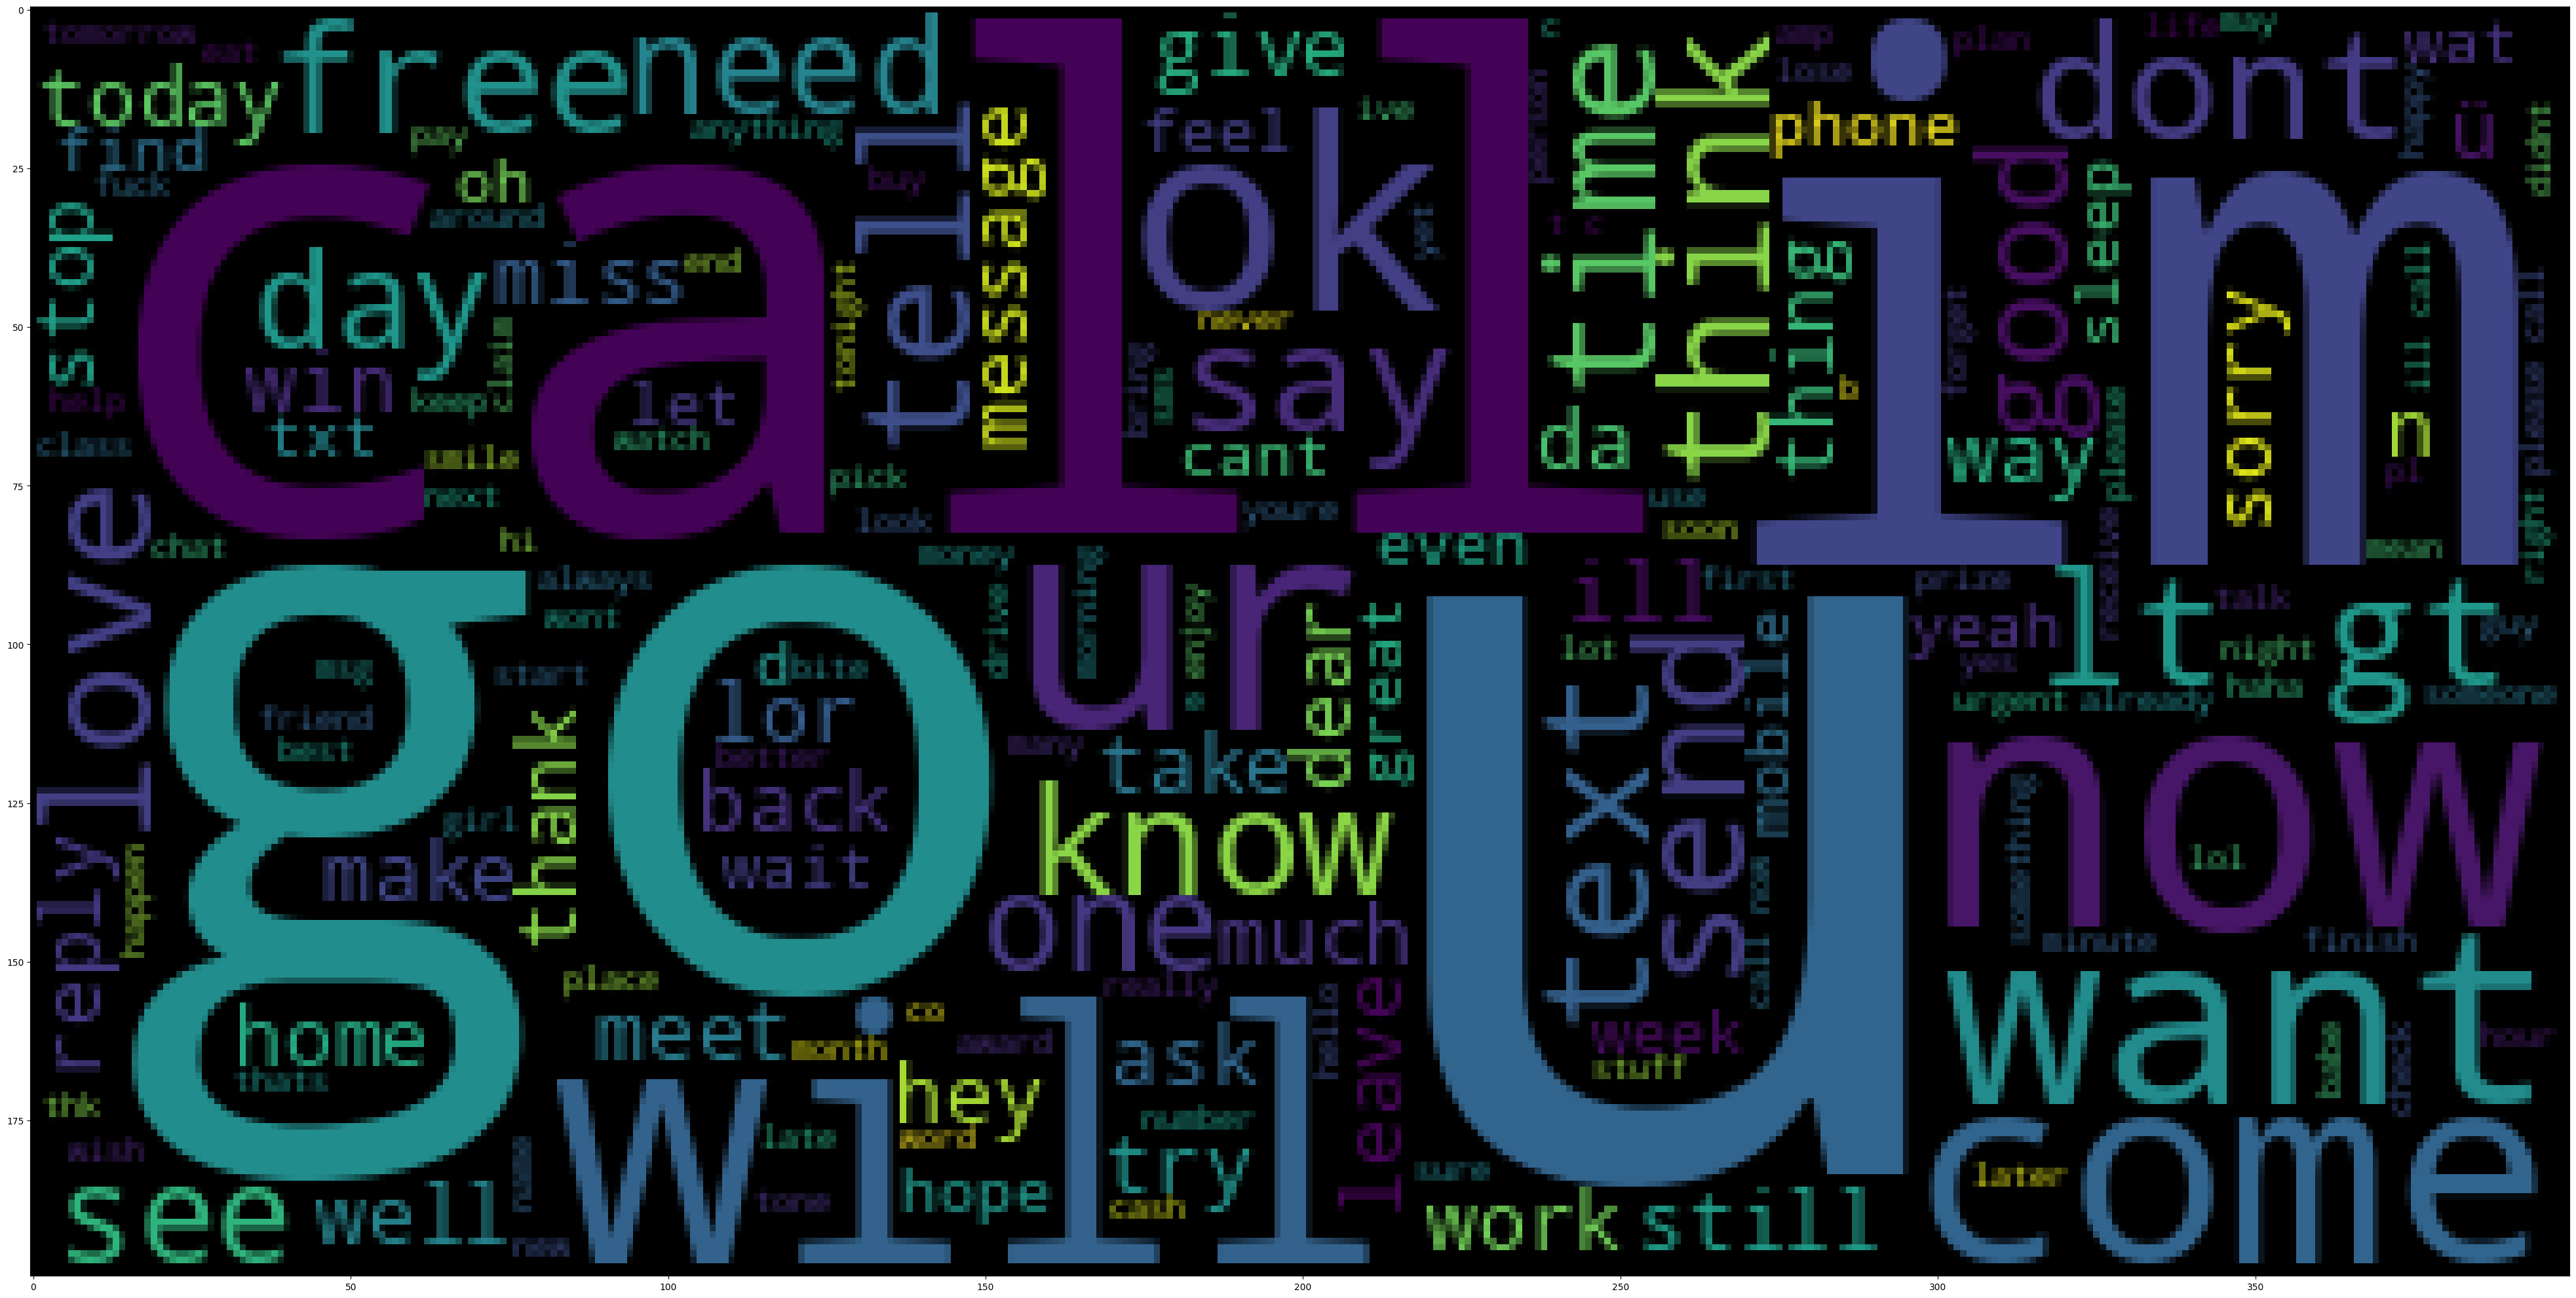

In [ ]:
# Wordcloud using frequency of words
# using actual text
from matplotlib import pyplot as plt
wordcloud = WordCloud(stopwords=STOPWORDS).generate(' '.join(train_x.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(50,50))
plt.imshow(wordcloud)

Building a Naive Bayes model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(DTM,train_y)

MultinomialNB()

In [ ]:
X_test_dtm = vect.transform(test_x)  # convert x_test to dtm

In [ ]:
# make class predictions for X_test_dtm
y_pred_class_train = nb.predict(DTM)
y_pred_class = nb.predict(X_test_dtm.toarray())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [ ]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(test_y, y_pred_class))

0.9760765550239234


In [ ]:
# confusion matrix
print(metrics.confusion_matrix(test_y, y_pred_class))

[[1430   18]
 [  22  202]]


In [ ]:
print(metrics.classification_report(train_y, y_pred_class_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3377
           1       0.91      0.93      0.92       523

    accuracy                           0.98      3900
   macro avg       0.95      0.96      0.95      3900
weighted avg       0.98      0.98      0.98      3900



In [ ]:
print(metrics.classification_report(test_y, y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1448
           1       0.92      0.90      0.91       224

    accuracy                           0.98      1672
   macro avg       0.95      0.94      0.95      1672
weighted avg       0.98      0.98      0.98      1672



Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_neighbors': [4,5,6], 'weights': ['distance','uniform']}

In [ ]:
model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring = 'precision')
model = model.fit(DTM, train_y)

In [ ]:
model.best_params_

{'n_neighbors': 4, 'weights': 'uniform'}

In [ ]:
knn= KNeighborsClassifier(n_neighbors=4,weights='uniform')

In [ ]:
knn.fit(DTM,train_y)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred_class_train = model.predict(DTM)
y_pred_class = model.predict(X_test_dtm.toarray())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(test_y, y_pred_class))

0.9288277511961722


In [ ]:
# confusion matrix
print(metrics.confusion_matrix(test_y, y_pred_class))

[[1448    0]
 [ 119  105]]


In [ ]:
print(metrics.classification_report(train_y, y_pred_class_train))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3377
           1       1.00      0.56      0.72       523

    accuracy                           0.94      3900
   macro avg       0.97      0.78      0.84      3900
weighted avg       0.95      0.94      0.93      3900



In [ ]:
print(metrics.classification_report(test_y, y_pred_class))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1448
           1       1.00      0.47      0.64       224

    accuracy                           0.93      1672
   macro avg       0.96      0.73      0.80      1672
weighted avg       0.93      0.93      0.92      1672



The accuracy on test data using Naive_bayes is 97.54% and KNN is 93%.

In [ ]:
# Word2vec

In [ ]:
! pip install gensim

In [ ]:
import gensim.downloader as api
wv=api.load("word2vec-google-news-300")  # a pre trained word2vec model called google-news-300

KeyboardInterrupt: 

In [ ]:
vect_king=wv['king']   # a 300 size vector can be generate using google news 300
vect_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Initialize Porter Stemmer
ps = PorterStemmer()

corpus = []
for i in range(len(sms)):
    # Remove non-alphabetic characters and convert to lowercase
    review = re.sub('[^a-zA-Z]', ' ', sms['message'][i])
    review = review.lower()
    # Tokenize the review
    review = review.split()
    # Stemming and removing stopwords
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    # Join the words back into a single string
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
len(corpus)

5572

In [ ]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine get amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri questionstd txt ratet cs appli over',
 'u dun say earli hor u c alreadi say',
 'nah dont think go usf live around though',
 'freemsg hey darl week word back id like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'im gonna home soon dont want talk stuff anymor tonight k ive cri enough today',
 'six chanc win cash pound txt csh send cost pday day tsandc appli repli hl info',
 'urgent win week free membership prize jackpot txt word claim c wwwdbuknet lccltd pobox ldnwarw',
 'ive se

In [ ]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine get amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri questionstd txt ratet cs appli over',
 'u dun say earli hor u c alreadi say',
 'nah dont think go usf live around though',
 'freemsg hey darl week word back id like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'im gonna home soon dont want talk stuff anymor tonight k ive cri enough today',
 'six chanc win cash pound txt csh send cost pday day tsandc appli repli hl info',
 'urgent win week free membership prize jackpot txt word claim c wwwdbuknet lccltd pobox ldnwarw',
 'ive se

In [ ]:
len(corpus)

5572

In [ ]:
tokenized_data = [text.split() for text in corpus]

In [ ]:
len(tokenized_data)

5572

In [ ]:
tokenized_data

[['go',
  'jurong',
  'point',
  'crazi',
  'avail',
  'bugi',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'get',
  'amor',
  'wat'],
 ['ok', 'lar', 'joke', 'wif', 'u', 'oni'],
 ['free',
  'entri',
  'wkli',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkt',
  'st',
  'may',
  'text',
  'fa',
  'receiv',
  'entri',
  'questionstd',
  'txt',
  'ratet',
  'cs',
  'appli',
  'over'],
 ['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say'],
 ['nah', 'dont', 'think', 'go', 'usf', 'live', 'around', 'though'],
 ['freemsg',
  'hey',
  'darl',
  'week',
  'word',
  'back',
  'id',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chg',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'mell',
  'mell',
  'oru',
  'minnaminungint',
  'nurungu',
  'vettam',
  'set',
  'callertun',
  'caller',
  'press',
  'copi',
  'friend',
  'callertun'],
 ['winner',
  'valu',
  'network',
 

In [ ]:
def total_distinct_word_length(tokenized_data):
    # Flatten the list of lists into a single list
    flattened_tokens = [word for sublist in tokenized_data for word in sublist]

    # Create a set from the flattened list to get unique words
    unique_words = set(flattened_tokens)

    # Return the length of the set of unique words
    return len(unique_words)

# Example usage:
#tokenized_data = [["apple", "banana"], ["apple", "orange", "grape"], ["banana"]]
total_length = total_distinct_word_length(tokenized_data)
print(total_length)

7051


In [ ]:
import gensim

In [ ]:
model = gensim.models.Word2Vec(tokenized_data,window=5,min_count=1)   # the word must be present two times in whole doc to enter in vocab

In [ ]:
model.wv.index_to_key      # all the selected vocabulary for training distinct words

['u',
 'get',
 'call',
 'go',
 'im',
 'ur',
 'come',
 'gt',
 'dont',
 'know',
 'lt',
 'free',
 'ok',
 'send',
 'day',
 'like',
 'love',
 'want',
 'ill',
 'time',
 'good',
 'text',
 'say',
 'think',
 'tell',
 'need',
 'see',
 'take',
 'one',
 'make',
 'txt',
 'today',
 'stop',
 'r',
 'home',
 'lor',
 'repli',
 'win',
 'sorri',
 'still',
 'back',
 'mobil',
 'n',
 'phone',
 'pleas',
 'week',
 'new',
 'hi',
 'work',
 'well',
 'later',
 'meet',
 'da',
 'ask',
 'give',
 'miss',
 'cant',
 'happi',
 'night',
 'tri',
 'leav',
 'claim',
 'thing',
 'wait',
 'much',
 'oh',
 'dear',
 'great',
 'hey',
 'hope',
 'pl',
 'wat',
 'messag',
 'number',
 'thank',
 'friend',
 'way',
 'c',
 'msg',
 'that',
 'right',
 'prize',
 'feel',
 'min',
 'let',
 'find',
 'ye',
 'even',
 'pick',
 'tomorrow',
 'alreadi',
 'b',
 'yeah',
 'realli',
 'e',
 'amp',
 'k',
 'care',
 'babe',
 'co',
 'keep',
 'sleep',
 'morn',
 'life',
 'p',
 'last',
 'didnt',
 'buy',
 'year',
 'servic',
 'sure',
 'anyth',
 'would',
 'cash',
 'no

In [ ]:
model.wv.similar_by_word('slave')

[('person', 0.9940862655639648),
 ('time', 0.994061291217804),
 ('game', 0.9940061569213867),
 ('dont', 0.9939478039741516),
 ('day', 0.9939083456993103),
 ('alreadi', 0.9939033389091492),
 ('take', 0.9938947558403015),
 ('month', 0.993885338306427),
 ('someon', 0.9938805103302002),
 ('tomorrow', 0.9938678741455078)]

In [ ]:
word_embeddings = {}

# Iterate over each word in the vocabulary
for word in model.wv.index_to_key:
    word_embeddings[word] = model.wv[word]

In [ ]:
word_embeddings

{'u': array([-0.44136602,  0.84530866,  0.08957545,  0.09513323,  0.10576173,
        -1.0008703 ,  0.43680778,  1.5930113 , -0.38613525, -0.3777356 ,
        -0.34694692, -1.0906556 ,  0.01032367,  0.27620378,  0.28182453,
        -0.5882464 ,  0.24036455, -1.0014634 , -0.01616373, -1.4663695 ,
         0.3984969 ,  0.3230829 ,  0.37997314, -0.36478475, -0.3446377 ,
         0.10027079, -0.5861375 , -0.413204  , -0.57544976,  0.04620748,
         0.69617593,  0.06411646,  0.18698694, -0.52271396, -0.26108375,
         0.78527176,  0.22824055, -0.7483103 , -0.57858986, -1.2025435 ,
         0.01982997, -0.6772008 , -0.15315211,  0.11117209,  0.5658757 ,
        -0.3848891 , -0.43914548, -0.25208876,  0.51865524,  0.44674265,
         0.44016477, -0.6867943 , -0.15730885,  0.03554546, -0.6183538 ,
         0.4772774 ,  0.711233  , -0.02375879, -0.7991067 ,  0.44777587,
         0.17707771,  0.25771135, -0.12630716, -0.13567033, -0.6036276 ,
         0.57652277,  0.41057765,  0.6300326 ,

In [ ]:
pd.DataFrame(word_embeddings)

,u,get,call,go,im,ur,come,gt,dont,know,...,wrki,dabook,eachoth,luckili,wwwtklscom,smoothli,nightsexcel,breakfast,hamper,rtking
0,-0.441366,-0.448425,-0.399298,-0.456253,-0.416475,-0.432644,-0.331209,-0.297468,-0.355600,-0.384274,...,-0.007172,-0.011298,-0.006016,-0.002181,-0.003843,0.004687,-0.018208,-0.013411,-0.008668,0.006172
1,0.845309,0.848585,0.769434,0.866649,0.783454,0.828719,0.642587,0.635937,0.661143,0.707012,...,0.005581,0.009192,0.005628,0.006819,-0.000062,0.008765,0.025283,0.012953,0.003971,-0.000453
2,0.089575,0.080918,0.037817,0.078837,0.061419,0.069565,0.059834,0.161851,0.068232,0.062694,...,0.010433,-0.002571,-0.001836,0.008991,0.006714,0.001395,0.000357,-0.001224,0.007844,-0.001619
3,0.095133,0.086146,0.051705,0.086653,0.081744,0.055642,0.068848,0.086386,0.079037,0.088118,...,0.001680,-0.001987,0.009724,0.009368,0.008104,0.008727,0.006426,-0.005832,-0.001007,-0.004231
4,0.105762,0.126524,0.114223,0.127358,0.118690,0.096133,0.087530,0.043334,0.102632,0.099393,...,0.009387,0.000872,0.006084,-0.008222,0.003334,0.006579,0.004576,-0.001654,-0.007670,-0.003234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.554799,0.541460,0.504242,0.551192,0.498205,0.534015,0.420265,0.404103,0.427844,0.452441,...,0.015884,0.000887,-0.002573,-0.002901,0.010627,0.004656,0.011691,0.018510,0.000577,0.000665
96,0.500283,0.521780,0.475599,0.526054,0.483402,0.501064,0.410698,0.459452,0.401297,0.429288,...,0.004098,0.011223,0.001646,0.000716,0.011575,-0.006749,0.004547,0.004383,-0.004212,-0.002460
97,-0.652700,-0.639005,-0.547769,-0.658622,-0.587946,-0.623292,-0.504224,-0.540250,-0.487721,-0.537658,...,-0.008188,-0.009034,-0.003566,-0.011014,-0.011623,-0.006929,-0.018345,-0.020941,-0.013962,-0.000986
98,0.031553,0.014546,0.027703,0.023268,0.026129,0.019192,0.020203,0.070381,0.027454,0.037089,...,-0.000033,0.008098,-0.005454,-0.005767,0.003386,-0.008899,0.000142,0.006299,-0.009553,0.004072


In [ ]:
 # avgWord2vec sentences embeddings then use ml models

In [ ]:
# Convert each text to a fixed-length vector by averaging word vectors
X = []
for text in tokenized_data:
    vectors = [model.wv[word] for word in text if word in model.wv]   # first we take a single word from each tokenize sentence
    if vectors:  # Check if the list is not empty                     # then if that word is present in word2vec vocublary then put that word in that list
      X.append(np.mean(vectors, axis=0))                              # after that caclculate mean of all words present in that sentence. If no words
                                                                      # is present in a vacubolary of word2vec of a particular sentence then put a zero size vector
    else:  # If list is empty, append a placeholder vector
        X.append(np.zeros(model.vector_size))  # Use zeros as a placeholder

X = np.array(X)
y = np.array(sms['label'])

In [ ]:
#Iterating over each word in the text, checking if it exists in the Word2Vec model's vocabulary.
#Creating a list vectors containing the word vectors of the words found in the vocabulary.
#Checking if the list vectors is not empty.
#If the list is not empty, calculating the mean of the word vectors along the first axis (axis=0).

In [ ]:
#Suppose 1st sentence
#'this': [0.1, 0.2, 0.3]    Mean: 0.1+0.2+0.3+0.4/4=0.25  1st sentence= [0.25,0.35,0.45]   Sentence embedding for 1st messsage
#'is': [0.2, 0.3, 0.4]      Mean: 0.2+0.3+0.4+0.5/4=0.35
#'a': [0.3, 0.4, 0.5]       Mean: 0.3+0.4+0.5+0.6/4=0.45
#'sentence': [0.4, 0.5, 0.6]

In [ ]:
X.shape

(5572, 100)

In [ ]:
y.shape

(5572,)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8681614349775785


In [ ]:
param_grid = {'n_neighbors': [4,5,6,8,10,12,14], 'weights': ['distance','uniform']}
model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring = 'precision')
model = model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 14, 'weights': 'distance'}

In [ ]:
knn_W= KNeighborsClassifier(n_neighbors=14,weights='distance')
knn_W.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14, weights='distance')

In [ ]:
# Predict on the test set
y_pred =knn_W.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9515695067264573


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB  # dom't take negative values MNB
gensigb = GaussianNB()
gensigb.fit(X_train,y_train)

GaussianNB()

In [ ]:
# Predict the labels of test data
y_pred = gensigb.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5076233183856502


In [ ]:
# MNB is good with dealing count values or text data where we convert to count or frequencies if neg values are there it not work.
# Basically MNB is used for classification task with discrete features
# GNB is good for classification task when features are continuous. It assumes features follows gaussian or normal distribution
# Bernaulli NB is similar to Multinomial Naive Bayes but is designed for binary/boolean features. It's commonly used in text classification tasks where features are binary indicators